Dairy And Bakery Product Redistribution Project Idea

In [41]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Data Loading (This is randomly created using ChatGPT. When performing in the real world, we need to follow the actual features of the data.)
df=pd.read_csv(r'C:\Users\Pcc\Desktop\Dairy And Beakery Product\D_&_B Data.csv')
df.head()

,SN,Product,Qty,Unit_Price,Total Value,Retailer_Name,Retailer_Location,Stock_Excess,MFG_Date,Exp_Date,Days_Difference,Resell_Percentage
0,1,Cake,139,340.62,47346.18,Retailer_B,Hyderabad,33,7/29/2023,10/27/2023,90,78.81
1,2,Cake,16,407.26,6516.16,Retailer_E,Mumbai,8,11/27/2023,2/25/2024,90,84.02
2,3,Croissant,19,428.72,8145.68,Retailer_B,Delhi,42,12/6/2023,3/5/2024,90,22.75
3,4,Milk,121,330.81,40028.01,Retailer_B,Ahmedabad,23,7/19/2023,10/17/2023,90,42.38
4,5,Cake,51,114.64,5846.64,Retailer_E,Ahmedabad,30,5/16/2024,8/14/2024,90,39.37


In [43]:
#Checking Duplicates
df.duplicated().sum()

0

In [44]:
# Function for alert when product item usability dates crossed 70%
def alert_on_70_time_crossed(days_difference, days_used):
    if days_used > 0.7 * days_difference:
        return "Needs to resell"
    else:
        return "Product not crossed the resell limit"


In [45]:
#Exanmple
days_difference = 90
days_used = 65

alert = alert_on_70_time_crossed(days_difference, days_used)
print(alert)


Needs to resell


EDA

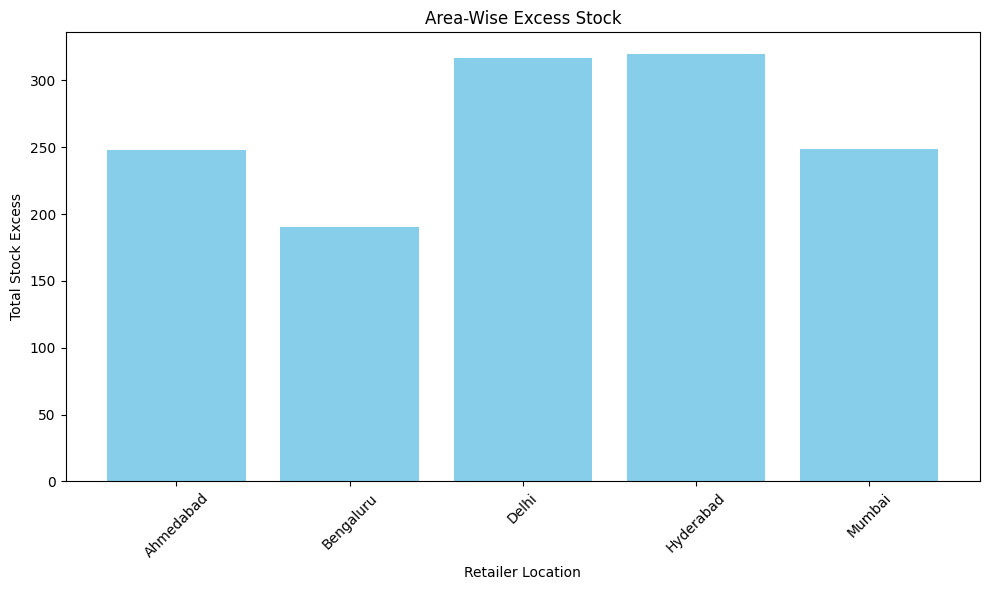

In [46]:
# Grouping data by 'Retailer_Location' and summing 'Stock_Excess'
area_wise_excess_stock = df.groupby('Retailer_Location')['Stock_Excess'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(area_wise_excess_stock['Retailer_Location'], area_wise_excess_stock['Stock_Excess'], color='skyblue')
plt.xlabel('Retailer Location')
plt.ylabel('Total Stock Excess')
plt.title('Area-Wise Excess Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
#Checking Data Statistical Properties
df.describe()

,SN,Qty,Unit_Price,Total Value,Stock_Excess,Days_Difference,Resell_Percentage
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000
mean,25.50000,99.780000,251.934000,25349.234400,26.480000,90.0,47.804000
std,14.57738,53.601435,123.864033,18686.567434,13.946311,0.0,23.476084
min,1.00000,14.000000,32.940000,467.460000,2.000000,90.0,8.880000
25%,13.25000,54.000000,156.332500,9180.900000,14.250000,90.0,27.495000
50%,25.50000,95.000000,250.560000,22053.420000,30.500000,90.0,46.450000
75%,37.75000,149.250000,355.337500,39408.165000,38.000000,90.0,62.157500
max,50.00000,189.000000,463.470000,70318.760000,47.000000,90.0,86.920000


In [48]:
#Checking Features
df.columns

Index(['SN', 'Product', 'Qty', 'Unit_Price', 'Total Value', 'Retailer_Name',
       'Retailer_Location', 'Stock_Excess', 'MFG_Date', 'Exp_Date',
       'Days_Difference', 'Resell_Percentage'],
      dtype='object')

In [49]:
#Making DataFrame Copy
df1=df.copy()

In [50]:
# Removing columns for machine learning
df_ml = df.drop(columns=['SN','Qty','Total Value','Retailer_Name','MFG_Date','Exp_Date'],inplace=True)

In [51]:
df.head()

,Product,Unit_Price,Retailer_Location,Stock_Excess,Days_Difference,Resell_Percentage
0,Cake,340.62,Hyderabad,33,90,78.81
1,Cake,407.26,Mumbai,8,90,84.02
2,Croissant,428.72,Delhi,42,90,22.75
3,Milk,330.81,Ahmedabad,23,90,42.38
4,Cake,114.64,Ahmedabad,30,90,39.37


In [52]:
#Seprating  Categorical and Numerical Columns
num_cols=df.dtypes[df.dtypes!='object'].index
cat_cols=df.dtypes[df.dtypes=='object'].index

In [53]:
#Checking Correlation
corr=df[num_cols].corr()
corr

,Unit_Price,Stock_Excess,Days_Difference,Resell_Percentage
Unit_Price,1.000000,0.181745,NaN,0.039553
Stock_Excess,0.181745,1.000000,NaN,0.056162
Days_Difference,NaN,NaN,NaN,NaN
Resell_Percentage,0.039553,0.056162,NaN,1.000000


Note: Days_Difference has same Values thats why their values displying as NaN.

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_Price,50.0,251.934,123.864033,32.94,156.3325,250.56,355.3375,463.47
Stock_Excess,50.0,26.480,13.946311,2.00,14.2500,30.50,38.0000,47.00
Days_Difference,50.0,90.000,0.000000,90.00,90.0000,90.00,90.0000,90.00
Resell_Percentage,50.0,47.804,23.476084,8.88,27.4950,46.45,62.1575,86.92


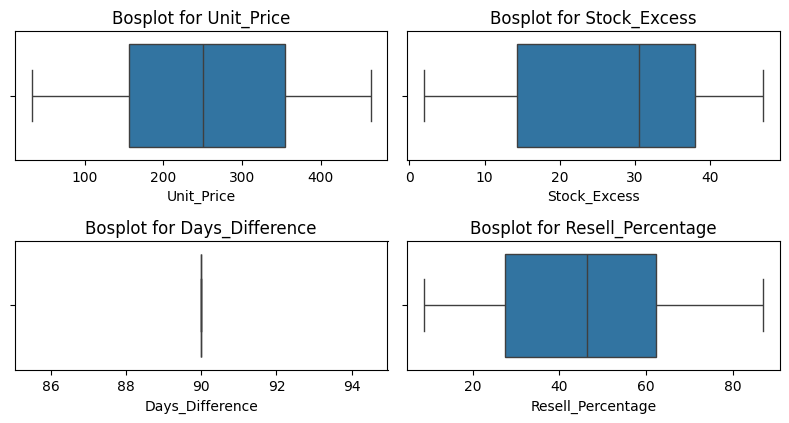

In [55]:
#Detecting Outliers
plt.figure(figsize=(8,6))
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Bosplot for {num_cols[i]}')
plt.tight_layout()
plt.show()

In [56]:
#Encoding Categorical Column
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [57]:
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [58]:
df.dtypes

Product                int32
Unit_Price           float64
Retailer_Location      int32
Stock_Excess           int64
Days_Difference        int64
Resell_Percentage    float64
dtype: object

In [59]:
#Selecting x and y
x=df.drop('Resell_Percentage',axis=1)
y=df['Resell_Percentage']
print(x.shape)
print(y.shape)


(50, 5)
(50,)


In [60]:
#Splitting Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(37, 5)
(13, 5)
(37,)
(13,)


In [61]:
#Creating Function for evaluation
from sklearn.metrics import *
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    Train_Score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    Test_mse=mean_squared_error(y_test,ypred)
    Test_rmse=np.sqrt(Test_mse)
    Test_mae=mean_absolute_error(y_test,ypred)
    res=pd.DataFrame({'Train_Score':Train_Score,'Test_Score':Test_score,'Test_MSE':Test_mse,
                      'Test_Rmse':Test_rmse,'Test_Mae':Test_mae},index=[mname])
    return res

In [62]:
#Model Importing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [63]:
LR=LinearRegression()
LR_Res=eval_model(LR,x_train,x_test,y_train,y_test,'LR')
LR_Res

,Train_Score,Test_Score,Test_MSE,Test_Rmse,Test_Mae
LR,0.043841,0.067084,466.870179,21.607179,18.059829


In [64]:
DT=DecisionTreeRegressor(max_depth=1,min_samples_split=3)
DT_Res=eval_model(DT,x_train,x_test,y_train,y_test,'DT')
DT_Res

,Train_Score,Test_Score,Test_MSE,Test_Rmse,Test_Mae
DT,0.087234,0.086077,457.365378,21.386102,18.686051


In [65]:
#Predicting in Best Model 
DT.fit(x,y)

DecisionTreeRegressor(max_depth=1, min_samples_split=3)

In [69]:
# Generating Random Data Points for Prediction
Random_Data = df.sample(n=10)

# Dropping the 'Resell_Percentage' column
Data_for_Prediction = Random_Data.drop(columns=['Resell_Percentage'])

# Making predictions
Predictions = DT.predict(Data_for_Prediction)

# Adding the predictions as a new column in the Random_Data DataFrame
Random_Data['Predicted_Resell_Percentage'] = Predictions

Random_Data.head()

,Product,Unit_Price,Retailer_Location,Stock_Excess,Days_Difference,Resell_Percentage,Predicted_Resell_Percentage
33,1,301.92,1,38,90,32.54,57.076111
28,2,299.48,0,43,90,51.81,57.076111
24,0,39.49,2,34,90,24.46,57.076111
23,4,186.59,0,31,90,34.09,42.588438
22,3,259.07,3,19,90,69.00,57.076111


In [70]:
#DataFrame & Model Saving
import pickle
pickle.dump(DT,open('DT_24-06-2024.pkl','wb'))
pickle.dump(df1,open('df1_24-06-2024','wb'))

Here we are predicting the percentage chance to resell a particular product within the remaining 30% of its time to expiry. Below are the steps to complete this cycle:

1.Creating a Centralized Inventory System: Connect all retailers to the system to keep their stock updated in real-time.

2.Developing the Main App: This app will generate alerts for both retailers and manufacturers. The primary responsibility of informing the manufacturer about the stock status lies with the retailer.

3.Implementing Machine Learning Techniques: Use the machine learning model to predict the chances of reselling a particular product and to estimate the wastage percentage.

4.Managing Product Redistribution: Based on the predictions, the manufacturer or retailer will collect the product and either send it to the nearest retailer where there is demand or sell it at a discount to reduce wastage and provide compensation assurance.
